# Helping guids:

### https://amitness.com/2020/04/recurrent-layers-keras/

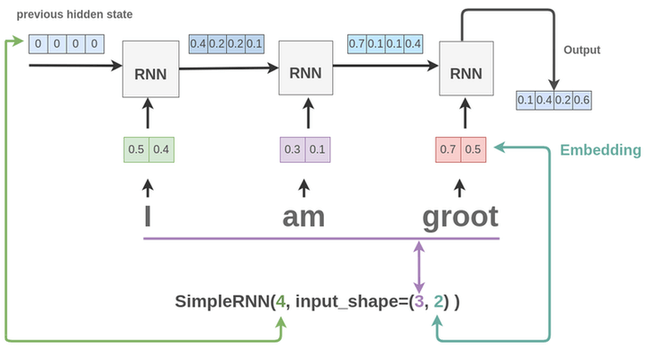

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data

Use Numpy to create a simple sine wave.

In [2]:
x = np.linspace(0,50,501)

In [3]:
#x

In [4]:
y = np.sin(x)

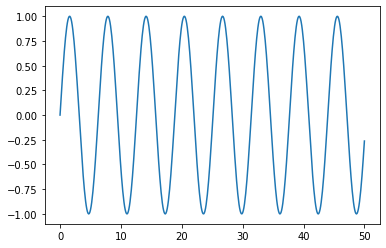

In [5]:
plt.plot(x,y)

In [6]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [7]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [8]:
len(df)

501

## Train Test Split

Note! This is different from our usual test/train split methodology!

In [9]:
test_precent = 0.1

In [10]:
len(df)*test_precent

50.1

In [11]:
test_point = np.round(len(df)*test_precent)

In [12]:
test_point

50.0

In [13]:
test_ind = int(len(df)-test_point)

In [14]:
test_ind

451

In [15]:
test = df.iloc[test_ind:]

In [16]:
train = df.iloc[:test_ind]

In [17]:
#train

## Scale Data

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
scaled_train = scaler.fit_transform(train)

In [21]:
scaled_test = scaler.transform(test)

# Batch Generator

## Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
#help(TimeseriesGenerator)

In [24]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length,
                               batch_size=batch_size)

In [25]:
# What does the first batch look like?
X,y = generator[0]

In [26]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.49999912 0.54991622]
Predict this y: 
 [[0.59933458]]


# Creating The Model

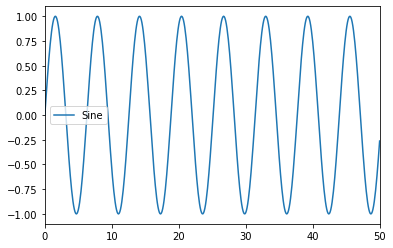

In [27]:
df.plot()

In [28]:
length = 100
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length,
                               batch_size=batch_size)

In [29]:
from tensorflow.keras.models import Sequential

In [30]:
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

In [31]:
# We're only using one feature in our time series (explained in the upper image)
n_features = 1

In [32]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit_generator(generator, epochs=5)

Epoch 1/5


C:\Users\Roni\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


351/351 [==============================] - 4s 9ms/step - loss: 0.0524
Epoch 2/5
351/351 [==============================] - 3s 9ms/step - loss: 5.8300e-04
Epoch 3/5
351/351 [==============================] - 3s 9ms/step - loss: 9.0616e-05
Epoch 4/5
351/351 [==============================] - 3s 9ms/step - loss: 3.2575e-05
Epoch 5/5
351/351 [==============================] - 3s 9ms/step - loss: 2.6489e-04


In [35]:
losses = pd.DataFrame(model.history.history)

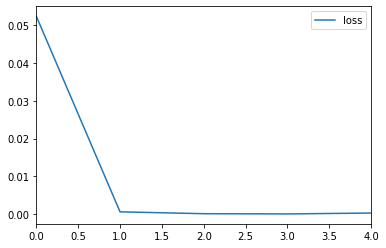

In [36]:
losses.plot()

In [37]:
losses.head()

,loss
0,0.052433
1,0.000583
2,0.000091
3,0.000033
4,0.000265


# Evaluate on Test Data

In [38]:
first_eval_batch = scaled_train[-length:]

In [39]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [40]:
first_eval_batch.shape

(1, 100, 1)

In [41]:
model.predict(first_eval_batch)

array([[1.0006552]], dtype=float32)

In [42]:
scaled_test[0]

array([0.94955134])

In [43]:
test_pred = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

In [44]:
#first_eval_batch

In [45]:
#predicted_value = [[[99]]]
#np.append(current_batch[:,1:,:],[[[99]]],axis=1)

In [48]:
test_pred = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_pred.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [49]:
test_pred - scaled_test

array([[ 0.05110383],
       [ 0.03491211],
       [ 0.01970602],
       [ 0.02736169],
       [ 0.05104138],
       [ 0.04446401],
       [ 0.02551157],
       [ 0.03232478],
       [ 0.03500125],
       [ 0.02905501],
       [ 0.02862226],
       [ 0.03258047],
       [ 0.02710356],
       [ 0.02726705],
       [ 0.03281411],
       [ 0.04214955],
       [ 0.03582444],
       [ 0.03068288],
       [ 0.04456642],
       [ 0.05224645],
       [ 0.04854399],
       [ 0.03964355],
       [ 0.05168545],
       [ 0.05808438],
       [ 0.04918838],
       [ 0.04088612],
       [ 0.04830736],
       [ 0.05297073],
       [ 0.03507199],
       [ 0.03109635],
       [ 0.04196382],
       [ 0.04002228],
       [ 0.01793055],
       [ 0.01635901],
       [ 0.03094742],
       [ 0.02071613],
       [-0.0035488 ],
       [ 0.00273968],
       [ 0.016304  ],
       [-0.0028496 ],
       [-0.01508688],
       [ 0.00051182],
       [ 0.01150173],
       [-0.02377052],
       [-0.03100993],
       [ 0

In [50]:
true_predictions = scaler.inverse_transform(test_pred)

In [51]:
test['Predictions'] = true_predictions

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


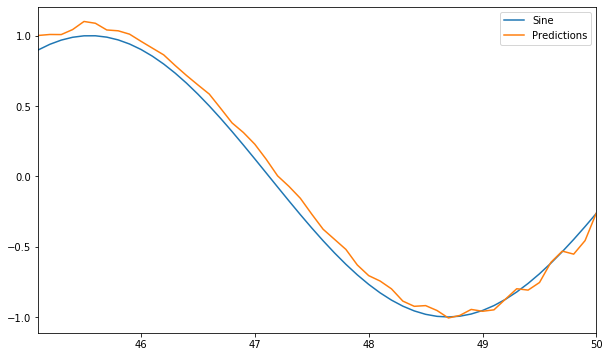

In [52]:
test.plot(figsize=(10,6))

# Using LSTM

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [55]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length, batch_size=1)

validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length, batch_size=1)

In [56]:
X,y = validation_generator[0]

In [57]:
#X

In [58]:
y

array([[0.36881064]])

In [59]:
model = Sequential()

model.add(LSTM(100, input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [60]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,
                   callbacks=[early_stop])

C:\Users\Roni\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
402/402 [==============================] - 6s 12ms/step - loss: 0.0157 - val_loss: 2.3057e-05
Epoch 2/20
402/402 [==============================] - 4s 11ms/step - loss: 3.3546e-05 - val_loss: 3.6882e-05
Epoch 3/20
402/402 [==============================] - 4s 11ms/step - loss: 5.5243e-04 - val_loss: 4.9098e-05


In [61]:
test_pred = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_pred.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


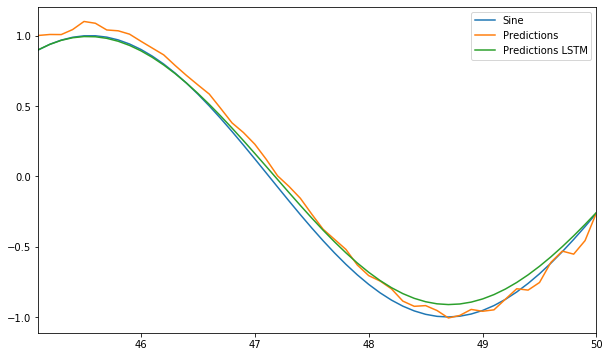

In [62]:
true_predictions = scaler.inverse_transform(test_pred)
test['Predictions LSTM'] = true_predictions
test.plot(figsize=(10,6))

# Forcast beyond X=50 

Forecast into unknown range. We should first utilize all our data, since we are now forecasting!

In [63]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [64]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [65]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=6)

C:\Users\Roni\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/6
451/451 [==============================] - 6s 11ms/step - loss: 0.0104
Epoch 2/6
451/451 [==============================] - 5s 11ms/step - loss: 2.6292e-04
Epoch 3/6
451/451 [==============================] - 5s 10ms/step - loss: 2.4279e-04
Epoch 4/6
451/451 [==============================] - 5s 11ms/step - loss: 1.9586e-04
Epoch 5/6
451/451 [==============================] - 5s 11ms/step - loss: 5.9412e-05
Epoch 6/6
451/451 [==============================] - 4s 10ms/step - loss: 3.2181e-04


In [66]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [67]:
forecast = scaler.inverse_transform(forecast)

In [68]:
df.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [69]:
forecast_index = np.arange(50.1,55.1,step=0.1)

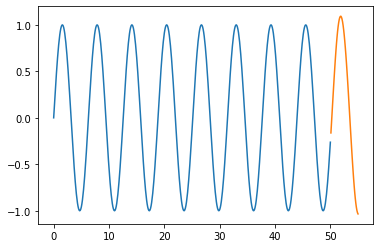

In [70]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)